In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#### Base de dados Plano de Saude

In [4]:
base_plano_saude = pd.read_csv('Bases de dados\plano_saude.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\diego\AppData\Local\Temp\ipykernel_8592\317408397.py:1: SyntaxWarning: invalid escape sequence '\p'
  base_plano_saude = pd.read_csv('Bases de dados\plano_saude.csv')


In [5]:
base_plano_saude.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [6]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
y_plano_saude = base_plano_saude.iloc[:, 1].values

In [7]:
X_plano_saude   

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [8]:
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [9]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [11]:
X_plano_saude.shape

(10, 1)

In [13]:
X_plano_saude= X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

In [16]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [17]:
#b0 -define onde começa a linha
regressor_plano_saude.intercept_


-558.9490909090912

In [18]:
# b1 - define o declive ad linha
regressor_plano_saude.coef_

array([61.86787879])

Regressão linear entre os atributos: quanto maior a idade, maior o custo

b0 e b1 definem a localização da linha (treinamento)

In [20]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [22]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [25]:
# 
grafico = px.scatter(x= X_plano_saude.ravel(), y=y_plano_saude)
grafico.add_scatter(x=X_plano_saude.ravel(), y=previsoes, name='regresao')
grafico.show()

In [27]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [28]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [29]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

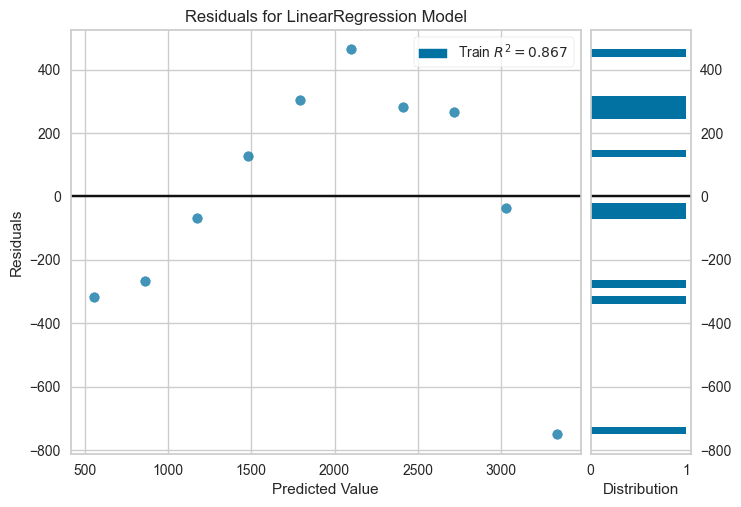

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [30]:
from yellowbrick.regressor import ResidualsPlot
visualiador = ResidualsPlot(regressor_plano_saude)
visualiador.fit(X_plano_saude, y_plano_saude)
visualiador.poof()

#### Base de dados Preço das casas

In [31]:
base_casas = pd.read_csv('Bases de dados\house_prices.csv')
base_casas.head()

<>:1: SyntaxWarning:

invalid escape sequence '\h'

<>:1: SyntaxWarning:

invalid escape sequence '\h'

C:\Users\diego\AppData\Local\Temp\ipykernel_8592\2201450271.py:1: SyntaxWarning:

invalid escape sequence '\h'



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Neste estudo de caso vamos usar  apenas o sqft living (metragem) para prever o price (preço) da casa

In [32]:
base_casas.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
print(base_casas.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [38]:
base_casas['date'] = pd.to_numeric(base_casas['date'].str.replace('T', ''), errors='coerce')


In [39]:
base_casas.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009857,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.009857,1.000000,0.003033,-0.010493,-0.027523,-0.029791,0.005599,-0.022550,-0.003798,0.001063,...,-0.031464,-0.024421,-0.016130,0.003248,-0.024070,0.001235,-0.029770,-0.000301,-0.022752,0.000154
price,-0.016762,0.003033,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.010493,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.027523,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.029791,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.005599,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022550,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,-0.003798,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.001063,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


<Axes: >

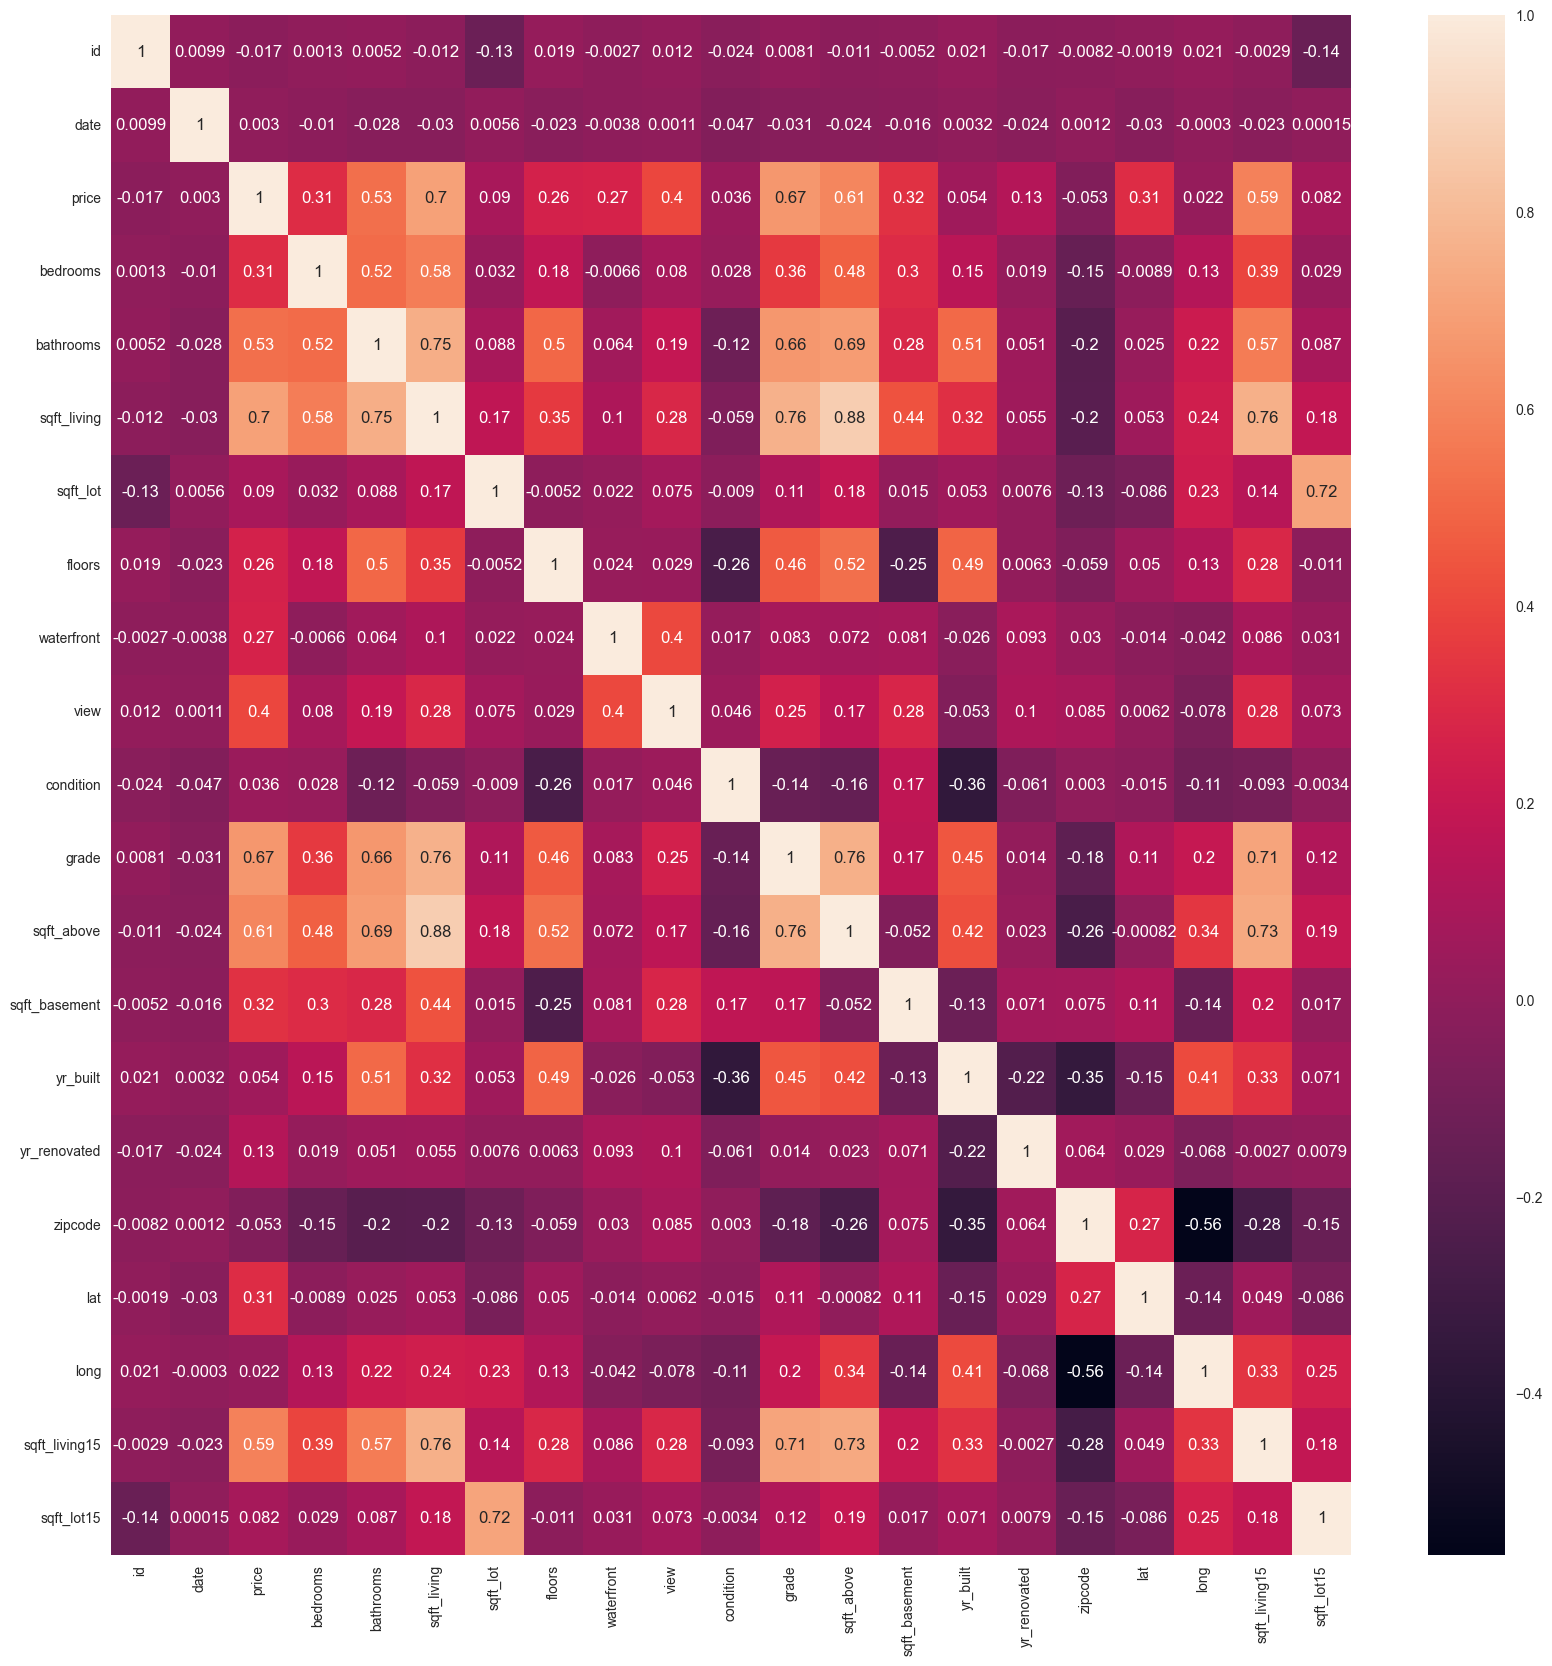

In [42]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True)

In [43]:
X_casas = base_casas.iloc[:, 5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [44]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [54]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [56]:
print(X_casas_treinamento.shape)
print(y_casas_treinamento.shape)

(15129, 1)
(15129,)


In [57]:
print(X_casas_teste.shape)
print(y_casas_teste.shape)

(6484, 1)
(6484,)


In [58]:
regresssor_simples_casas = LinearRegression()
regresssor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [59]:
regresssor_simples_casas.intercept_ # b0

-37893.59850106703

In [60]:
regresssor_simples_casas.coef_ #b1


array([278.32860644])

In [62]:
regresssor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [63]:
regresssor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453016

In [64]:
previsoes = regresssor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [65]:
grafico = px.scatter(x=X_casas_treinamento.ravel(), y=previsoes)
grafico.show()

In [70]:
grafico1 = px.scatter(x=X_casas_treinamento.ravel(), y= y_casas_treinamento)
grafico2 = px.line(x=X_casas_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3